In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from data_conversion import conversion

In [2]:
geno = conversion.get_geno_data()
geno = conversion.drop_single_value_cols(geno)
geno_binary = conversion.convert_geno_to_binary(geno)
geno_ternary = conversion.convert_geno_to_ternary(geno)

c:\Users\gaga6\Documents\erdos\erdos-mouse-data\erdos-mouse-data\data_conversion\conversion.py:38: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return df.replace(to_replace=all_replacements)


In [3]:
pheno = conversion.get_pheno_data()

In [71]:
from sklearn.model_selection import train_test_split
df_all = pd.concat([geno, geno_binary, geno_ternary, pheno], axis=1)
df_train, df_test = train_test_split(df_all, test_size=0.2, random_state=402)

geno_cols = geno.columns
binary_cols = geno_binary.columns
ternary_cols = geno_ternary.columns
pheno_cols = pheno.columns

In [72]:
pheno.columns

Index(['Sex', 'Batch', 'WBC', 'NEUT'], dtype='object')

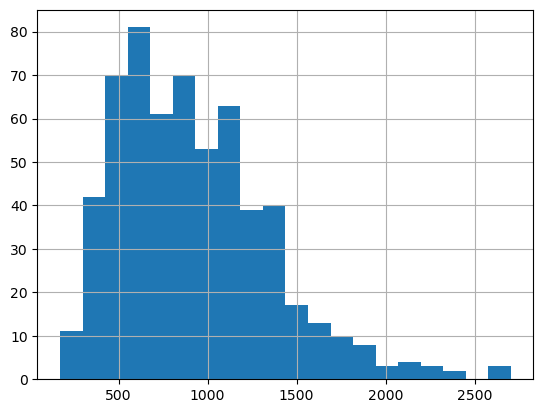

In [73]:
df_train.NEUT.hist(bins=20)
plt.show()

In [74]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso

In [86]:
#binary_neut_preprocessor = ColumnTransformer([('keepbinary', 'passthrough', binary_cols)])

linreg = LinearRegression()
linreg.fit(df_train[binary_cols], y=df_train['NEUT'])
linear_coefs = pd.Series(linreg.coef_, index=binary_cols)

lassoreg = Lasso(alpha=0.1, max_iter=5000)
lassoreg.fit(df_train[binary_cols], y=df_train['NEUT'])
lasso_coefs = pd.Series(lassoreg.coef_, index=binary_cols)

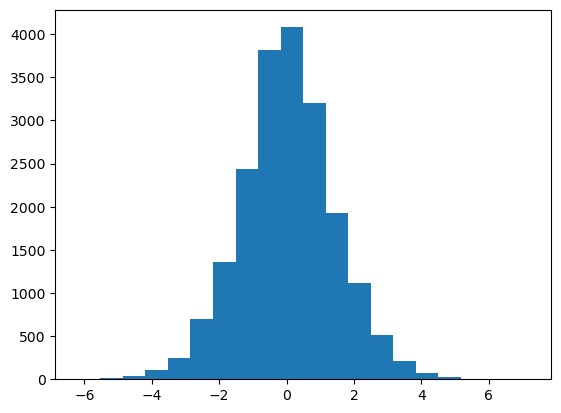

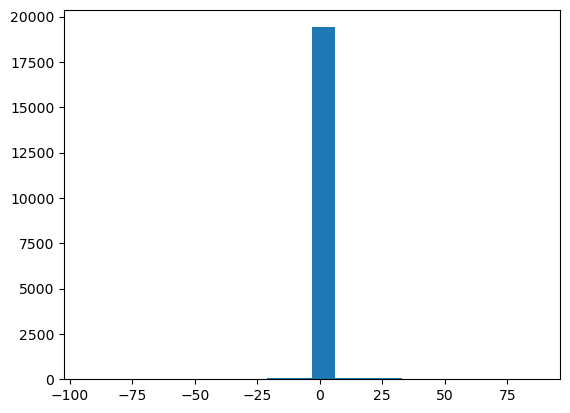

In [92]:
plt.hist(linear_coefs, bins=20)
plt.show()

plt.hist(lasso_coefs, bins=20)
plt.show()

In [87]:
lasso_coefs.sort_values()

backupUNC200011470_AG   -93.250334
JAX00313763_AG          -73.528690
UNC080272713_AG         -73.398003
UNC070580184_TC         -71.616129
backupUNC050086001_CC   -69.468817
                           ...    
UNC200580975_CC          69.310479
JAX00042454_AG           71.318877
UNC110161540_AG          71.592757
backupUNC150415457_AA    80.949776
UNC090280590_AG          87.053831
Length: 19877, dtype: float64

In [88]:
lasso_coefs[lasso_coefs != 0]

UNC010515556_AG        -22.682115
UNC010516347_AG         -1.844224
backupJAX00000484_AG    -1.351672
UNC010019700_TT         41.225354
UNC_rs48518594_TG       -0.409649
                          ...    
UNC200242317_AC         -8.606220
UNC200046565_GG          6.222754
UNC200207852_TC        -13.671808
UNC200207852_TT         22.065976
JAX00723000_TC         -11.537977
Length: 626, dtype: float64

In [89]:
with pd.option_context('display.max_rows', None):
    display(lasso_coefs[lasso_coefs != 0].sort_values())

backupUNC200011470_AG   -9.325033e+01
JAX00313763_AG          -7.352869e+01
UNC080272713_AG         -7.339800e+01
UNC070580184_TC         -7.161613e+01
backupUNC050086001_CC   -6.946882e+01
UNC120405756_TC         -5.709201e+01
JAX00548377_TC          -5.530018e+01
UNC020991469_AG         -5.393012e+01
UNC030314944_AC         -5.347006e+01
backupUNC030397650_CC   -5.257312e+01
UNC061512953_GG         -5.073690e+01
UNC140285643_AA         -4.943215e+01
UNC190026191_GG         -4.919046e+01
UNC130068723_TG         -4.721477e+01
UNC070451720_TC         -4.700697e+01
backupUNC130285948_AC   -4.700328e+01
UNC070425980_AG         -4.523463e+01
UNC190180843_TC         -4.405320e+01
UNC140025084_TT         -4.087447e+01
JAX00042454_AA          -4.040140e+01
JAX00401538_TC          -3.850728e+01
JAX00068495_AA          -3.828087e+01
JAX00069390_AC          -3.828015e+01
JAX00084364_TC          -3.710271e+01
UNC120430727_TG         -3.704792e+01
UNC130272753_CC         -3.682109e+01
UNC180251681

In [113]:
def compute_distance(df_binary, threshold):
    df_plusminus = 2 * df_binary - 1
    threshold_plusminus = 2 * threshold - 1
    return df_plusminus.mul(threshold_plusminus, axis=0).sum()

In [154]:
neut_threshold_distances = compute_distance(df_train[binary_cols], df_train.NEUT > 1750)

(array([  35.,   43.,   44.,  103.,  167.,  167.,  174.,  206.,  313.,
        1522., 2789., 1923., 1696., 1436., 1739., 1931., 1862., 1863.,
        1035.,  829.]),
 array([-535. , -481.3, -427.6, -373.9, -320.2, -266.5, -212.8, -159.1,
        -105.4,  -51.7,    2. ,   55.7,  109.4,  163.1,  216.8,  270.5,
         324.2,  377.9,  431.6,  485.3,  539. ]),
 <BarContainer object of 20 artists>)

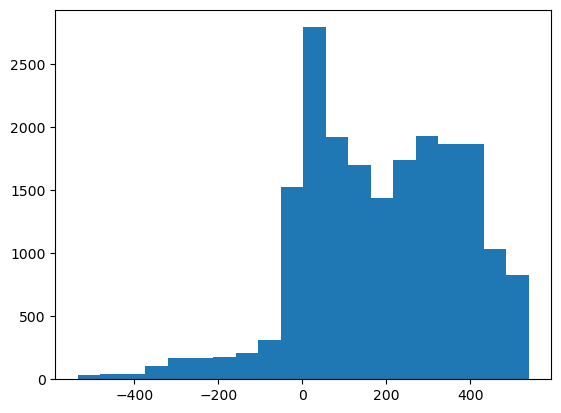

In [157]:
plt.hist(neut_threshold_distances, bins=20)

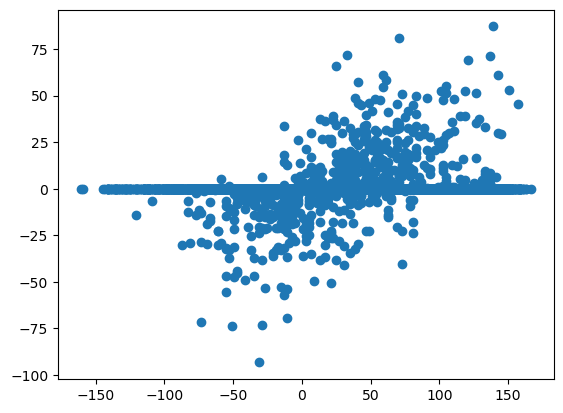

In [149]:
plt.scatter(neut_threshold_distances, lasso_coefs)
plt.show()

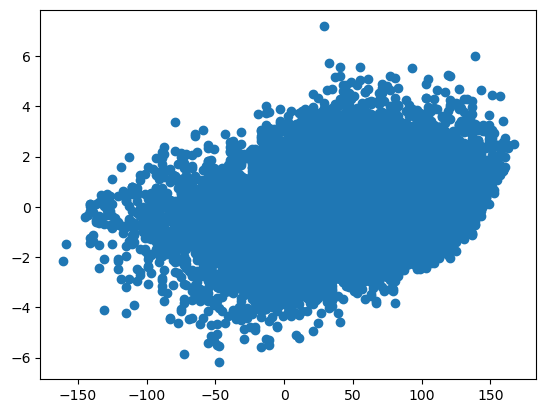

In [130]:
plt.scatter(neut_threshold_distances, linear_coefs)
plt.show()

In [131]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(df_train[binary_cols])

PCA()

In [150]:
df_train[binary_cols]

,JAX00240603_CC,JAX00240603_TC,JAX00240603_TT,UNC010515443_AA,UNC010515443_AG,UNC010515443_GG,UNC010001943_AA,UNC010001943_AC,UNC010001943_CC,UNC010515539_AA,...,UNC210001613_GG,JAX00725096_CC,JAX00725096_TC,JAX00725096_TT,JAX00725100_CC,JAX00725100_TC,JAX00725100_TT,JAX00725105_AA,JAX00725105_AG,JAX00725105_GG
JAXW202.2536,0,1,0,1,0,0,0,0,1,0,...,0,1,0,0,1,0,0,1,0,0
JAXW202.2352,1,0,0,0,0,1,0,0,1,0,...,0,1,0,0,1,0,0,1,0,0
JAXW202.3328,0,0,1,0,1,0,0,0,0,0,...,1,1,0,0,0,0,1,0,0,1
JAXW202.2207,0,0,1,0,1,0,0,0,0,0,...,0,0,0,1,0,0,1,1,0,0
JAXW202.2249,1,0,0,0,1,0,1,0,0,0,...,1,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
JAXW202.2721,0,1,0,0,1,0,1,0,0,0,...,1,1,0,0,1,0,0,1,0,0
JAXW202.2364,0,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,1,1,0,0
JAXW202.2556,0,1,0,0,0,1,0,1,0,1,...,0,0,0,1,0,0,1,1,0,0
JAXW202.2136,0,1,0,0,1,0,1,0,0,0,...,1,1,0,0,1,0,0,1,0,0


In [152]:
len(pca.explained_variance_)

593

(array([ 26., 207., 126.,  75.,  46.,  31.,  23.,  14.,  12.,  10.,   6.,
          5.,   4.,   2.,   3.,   2.,   0.,   0.,   0.,   1.]),
 array([1.08471486e-29, 1.86543061e+00, 3.73086122e+00, 5.59629183e+00,
        7.46172244e+00, 9.32715305e+00, 1.11925837e+01, 1.30580143e+01,
        1.49234449e+01, 1.67888755e+01, 1.86543061e+01, 2.05197367e+01,
        2.23851673e+01, 2.42505979e+01, 2.61160286e+01, 2.79814592e+01,
        2.98468898e+01, 3.17123204e+01, 3.35777510e+01, 3.54431816e+01,
        3.73086122e+01]),
 <BarContainer object of 20 artists>)

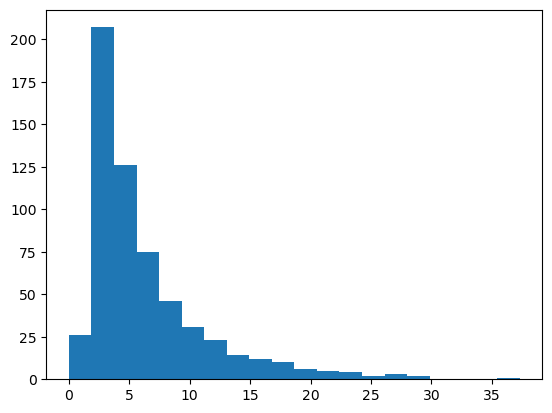

In [151]:
plt.hist(pca.explained_variance_, bins=20)

In [144]:
df_train[geno_cols].isna().sum().sort_values()

UNC070701190            0
UNC070701190            0
backupUNC190212525      0
backupUNC190212525      0
UNC190090409            0
                     ... 
UNC040546508          525
UNC020330101          529
UNC020330101          529
UNC120325121          562
UNC120325121          562
Length: 13450, dtype: int64